<a href="https://colab.research.google.com/github/JohnYCLam/MachineLearning/blob/main/TensorFlow_and_PyTorch_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST Dataset Demo - Tensorflow

In [82]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [125]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [126]:
x_train = x_train / 255
x_test = x_test / 255

In [127]:
image = x_train[0]
label = y_train[0]

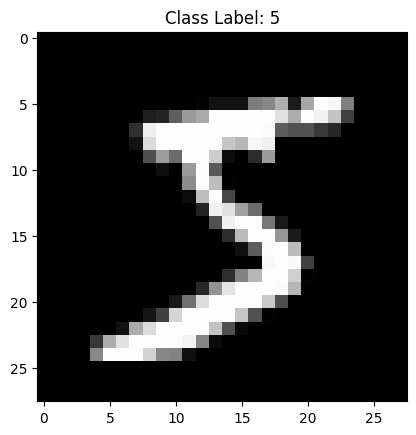

In [128]:
fig, ax = plt.subplots()
plt.imshow(image.squeeze(), cmap = "gray")
ax.set_title(f'Class Label: {label}')
plt.show();

In [120]:
image.shape

(28, 28)

In [87]:
import numpy as np

output_shape = len(np.unique(y_train))

In [88]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, Dense, Input

In [89]:
def simpleModel(input_shape, output_shape, act_units, drop_outs = None, act_fcn = 'relu'):

    model_sequence = [Input(shape = input_shape), Flatten()]
    for i in range(len(act_units)):
        model_sequence.append(Dense(act_units[i], activation = act_fcn))
        if type(drop_outs) == list:
            model_sequence.append(Dropout(drop_outs[i]))
    model_sequence.append(Dense(output_shape, activation = 'softmax'))
    model = tf.keras.models.Sequential(model_sequence)
    return model

In [129]:
model = simpleModel(image.shape, output_shape, [128], [0.2])
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_19 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [130]:
# difference between sparse categorical crossentropy and categorical crossentropy
# categorical crossentropy: the labels are in one-hot encoding, e.g. [0, 0, 0, 1]
# sparse categorical crossentropy: the labels are single values. e.g. 3
# https://stackoverflow.com/questions/58565394/what-is-the-difference-between-sparse-categorical-crossentropy-and-categorical-c
def model_train(model, x_train, y_train, x_test, y_test, loss, optimizer = 'adam', metrics = ['accuracy'], epochs = 10):

    model.compile(optimizer = optimizer, loss = loss, metrics = metrics)
    result = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = epochs)
    return result

In [131]:
result = model_train(model, x_train, y_train, x_test, y_test, 'sparse_categorical_crossentropy')

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8585 - loss: 0.4851 - val_accuracy: 0.9576 - val_loss: 0.1429
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9543 - loss: 0.1537 - val_accuracy: 0.9685 - val_loss: 0.1059
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9666 - loss: 0.1085 - val_accuracy: 0.9716 - val_loss: 0.0942
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9719 - loss: 0.0897 - val_accuracy: 0.9760 - val_loss: 0.0797
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9774 - loss: 0.0750 - val_accuracy: 0.9773 - val_loss: 0.0746
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9789 - loss: 0.0655 - val_accuracy: 0.9743 - val_loss: 0.0822
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9821 - loss: 0.0570 - val_accuracy: 0.9786 - val_loss: 0.0746
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9837 - loss: 0.0497 -

In [132]:
#if we use categorical crossentropy, we have to convert the labels into one-hot encoding first

y_train = tf.one_hot(y_train, depth = 10)
y_test = tf.one_hot(y_test, depth = 10)

model_2 = simpleModel(image.shape, output_shape, [128], [0.2])
result_2 = model_train(model_2, x_train, y_train, x_test, y_test, 'categorical_crossentropy')

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8640 - loss: 0.4747 - val_accuracy: 0.9589 - val_loss: 0.1380
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9538 - loss: 0.1527 - val_accuracy: 0.9663 - val_loss: 0.1085
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9685 - loss: 0.1039 - val_accuracy: 0.9747 - val_loss: 0.0865
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9716 - loss: 0.0875 - val_accuracy: 0.9773 - val_loss: 0.0759
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9768 - loss: 0.0740 - val_accuracy: 0.9783 - val_loss: 0.0736
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9805 - loss: 0.0596 - val_accuracy: 0.9793 - val_loss: 0.0696
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9822 - loss: 0.0583 - val_accuracy: 0.9786 - val_loss: 0.0705
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9839 - loss: 0.0493 

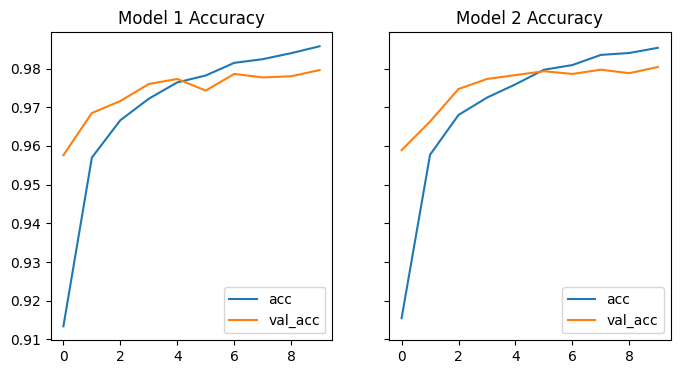

In [133]:
fig, ax = plt.subplots(1,2, figsize = (8, 4), sharey = True)

ax[0].plot(result.history['accuracy'], label = 'acc')
ax[0].plot(result.history['val_accuracy'], label = 'val_acc')
ax[0].set_title('Model 1 Accuracy')
ax[0].legend()
ax[1].plot(result_2.history['accuracy'], label = 'acc')
ax[1].plot(result_2.history['val_accuracy'], label = 'val_acc')
ax[1].set_title('Model 2 Accuracy')
ax[1].legend()
plt.show()

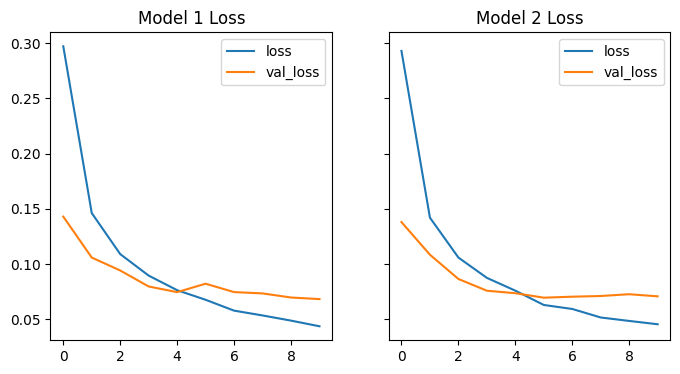

In [134]:
fig, ax = plt.subplots(1,2, figsize = (8, 4), sharey = True)

ax[0].plot(result.history['loss'], label = 'loss')
ax[0].plot(result.history['val_loss'], label = 'val_loss')
ax[0].set_title('Model 1 Loss')
ax[0].legend()
ax[1].plot(result_2.history['loss'], label = 'loss')
ax[1].plot(result_2.history['val_loss'], label = 'val_loss')
ax[1].set_title('Model 2 Loss')
ax[1].legend()
plt.show()